In [1]:
import pandas as pd  # Importing Pandas library
import seaborn as sns  # Importing Seaborn library
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("Staphylococcus_aureus_Infection_Data.csv")
#predict 30 day death

In [3]:
#Dropping blank data
data = data.dropna()

In [4]:
#converting AGE_GRP column
AGE_GRP = data.iloc[:,1]
age_grp = []
for i in AGE_GRP:
    if i == "00-10":
        age_grp.append(0)
    elif i == "11-20":
        age_grp.append(10)
    elif i == "21-30":
        age_grp.append(20)
    elif i == "31-40":
        age_grp.append(30)
    elif i == "41-50":
        age_grp.append(40)
    elif i == "51-60":
        age_grp.append(50)
    elif i == "61-70":
        age_grp.append(60)
    elif i == "71-80":
        age_grp.append(70)
    else:
        age_grp.append(80)
        
data.iloc[:,1] = age_grp

In [5]:
x = data.drop(["ThirtyDay_Death", "Unnamed: 0", "SixWeek_Death", "ThreeMo_Death", "SixMo_Death", "NineMo_Death", "OneYear_Death"], axis=1)
y = data["ThirtyDay_Death"].astype(object).astype(int)

#data.iloc[:,2] = y

#selecting the best 20 features
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=20)
x = selector.fit_transform(x, y) #new x with the best 20 features 

C:\Users\miche\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [2093 2094] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [6]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
from imblearn.over_sampling import RandomOverSampler

# apply random oversampling to the minority class
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

In [8]:
# Create KNN model with k=11
knnmodel = KNeighborsClassifier(n_neighbors=55)

#fit model
knnmodel.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=55)

In [9]:
#making a prediction
y_pred_train = knnmodel.predict(x_train)
y_pred_test = knnmodel.predict(x_test)


C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.6926841834106131


<AxesSubplot:>

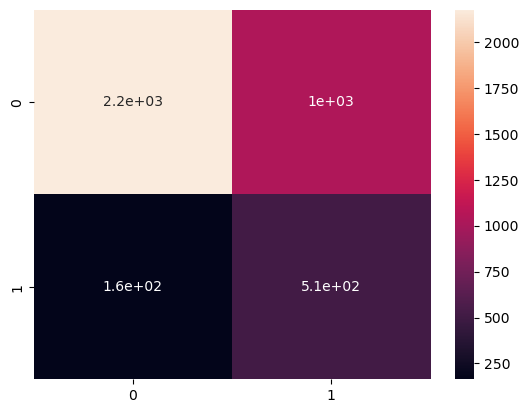

In [10]:
#Testing Accuracy of training data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_train, y_pred_train)

print(accuracy_score(y_train, y_pred_train))

sns.heatmap(cm, annot=True)

0.6720720720720721


<AxesSubplot:>

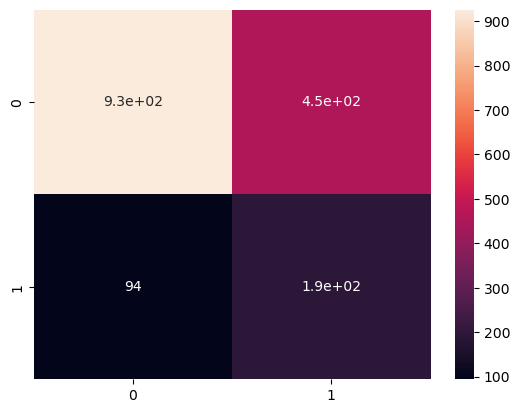

In [11]:
#Testing Accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_test)

print(accuracy_score(y_test, y_pred_test))

sns.heatmap(cm, annot=True)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Extract the true positives, true negatives, false positives, and false negatives
tn, fp, fn, tp = cm.ravel()

# Compute the sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the classification report
print(classification_report(y_test, y_pred_test))

# Print the sensitivity and specificity
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1378
           1       0.30      0.67      0.41       287

    accuracy                           0.67      1665
   macro avg       0.60      0.67      0.59      1665
weighted avg       0.80      0.67      0.71      1665

Sensitivity: 0.6724738675958188
Specificity: 0.6719883889695211
